<a href="https://colab.research.google.com/github/DariaBukharina/HWstatprac/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1


Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

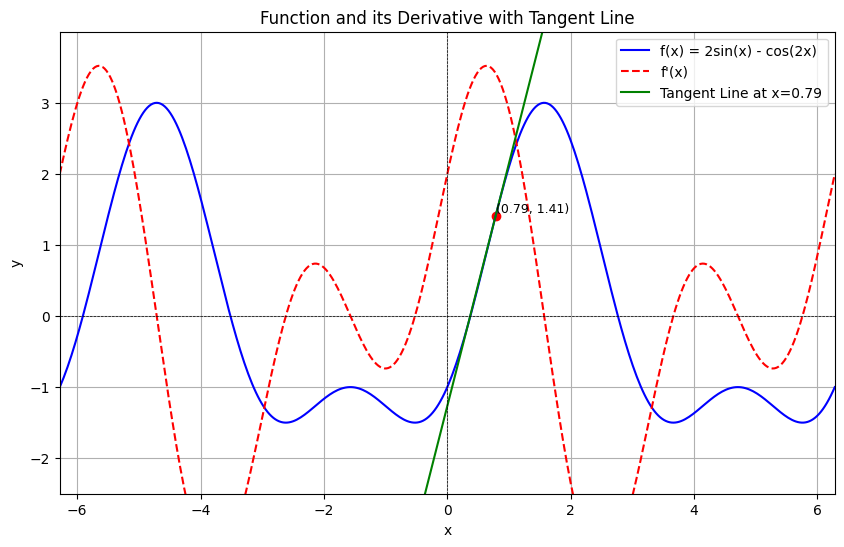

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)

def derivative_f(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(x):
    # Define the range for x
    x_values = np.linspace(-2 * np.pi, 2 * np.pi, 400)
    y_values = f(x_values)

    # Calculate the function value and its derivative at the point x
    f_at_x = f(x)
    derivative_at_x = derivative_f(x)

    # Calculate the tangent line
    tangent_line = f_at_x + derivative_at_x * (x_values - x)

    # Plot the function f(x)
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='f(x) = 2sin(x) - cos(2x)', color='blue')

    # Plot the derivative f'(x)
    derivative_values = derivative_f(x_values)
    plt.plot(x_values, derivative_values, label="f'(x)", color='red', linestyle='--')

    # Plot the tangent line
    plt.plot(x_values, tangent_line, label='Tangent Line at x={:.2f}'.format(x), color='green', linestyle='-')

    # Highlight the point on the curve
    plt.scatter([x], [f_at_x], color='red')  # Point on f(x)
    plt.text(x, f_at_x, '({:.2f}, {:.2f})'.format(x, f_at_x), fontsize=9, verticalalignment='bottom')

    # Enhance the plot
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.title('Function and its Derivative with Tangent Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.xlim(-2 * np.pi, 2 * np.pi)
    plt.ylim(min(y_values) - 1, max(y_values) + 1)
    plt.show()

# Example usage
beauty_derivative_plot(np.pi / 4)  # You can specify any point here


Problem 2
# The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

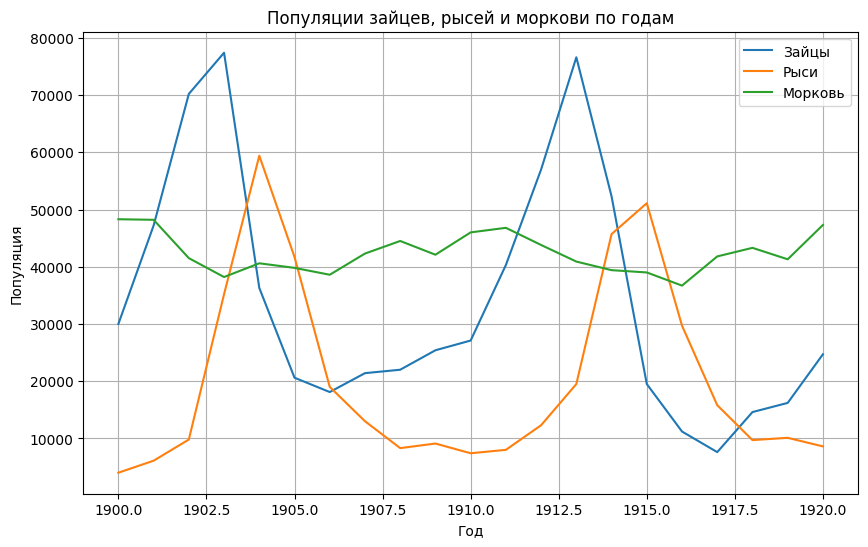

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Загрузка данных из файла
data = np.loadtxt('populations.txt', skiprows=1)
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# 1. Построение графика популяций каждого вида по годам
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Зайцы')
plt.plot(years, lynxes, label='Рыси')
plt.plot(years, carrots, label='Морковь')
plt.xlabel('Год')
plt.ylabel('Популяция')
plt.title('Популяции зайцев, рысей и моркови по годам')
plt.legend()
plt.grid(True)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

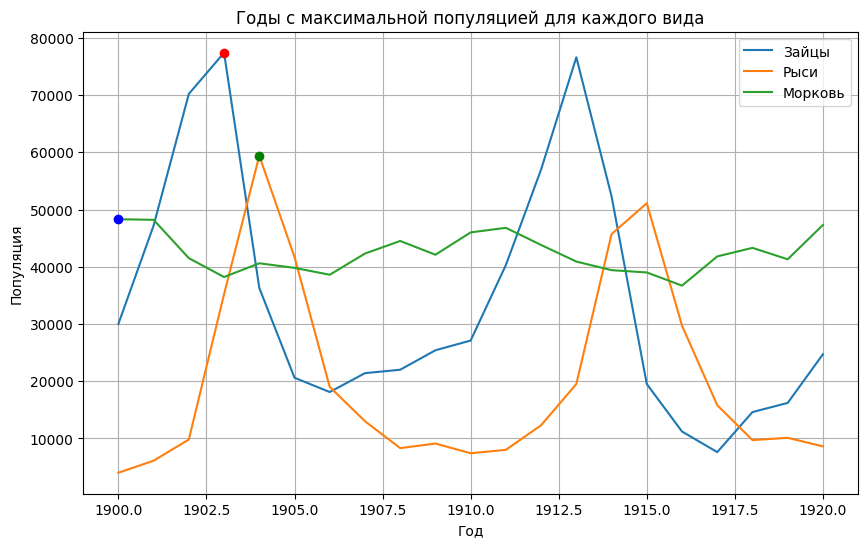

In [ ]:
# 2. Нахождение года с максимальной популяцией для каждого вида
max_hare_year = years[np.argmax(hares)]
max_lynx_year = years[np.argmax(lynxes)]
max_carrot_year = years[np.argmax(carrots)]

# Отметка годов с максимальной популяцией на графике
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Зайцы')
plt.plot(years, lynxes, label='Рыси')
plt.plot(years, carrots, label='Морковь')
plt.scatter(max_hare_year, np.max(hares), color='red', zorder=5)
plt.scatter(max_lynx_year, np.max(lynxes), color='green', zorder=5)
plt.scatter(max_carrot_year, np.max(carrots), color='blue', zorder=5)
plt.xlabel('Год')
plt.ylabel('Популяция')
plt.title('Годы с максимальной популяцией для каждого вида')
plt.legend()
plt.grid(True)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

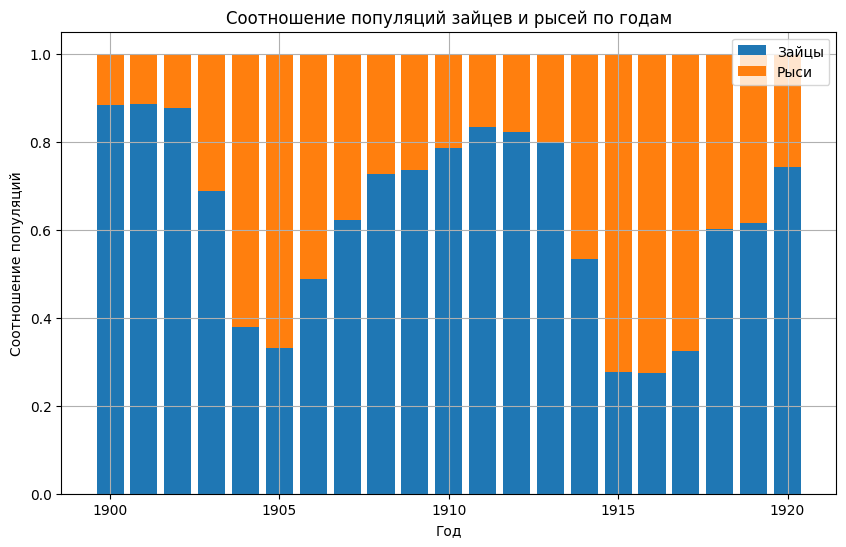

In [ ]:
# 3. Построение стекированного графика соотношения популяций зайцев и рысей
total_population = hares + lynxes
hare_ratio = hares / total_population
lynx_ratio = lynxes / total_population

plt.figure(figsize=(10, 6))
plt.bar(years, hare_ratio, label='Зайцы')
plt.bar(years, lynx_ratio, bottom=hare_ratio, label='Рыси')
plt.xlabel('Год')
plt.ylabel('Соотношение популяций')
plt.title('Соотношение популяций зайцев и рысей по годам')
plt.legend()
plt.grid(True)
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

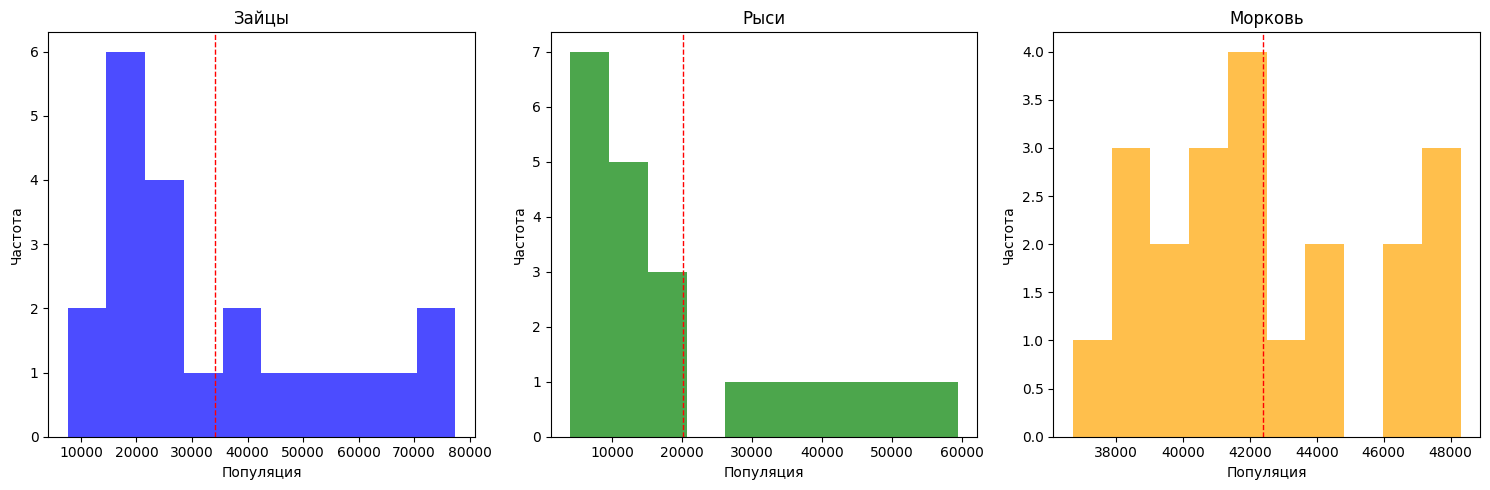

In [ ]:
# 4. Нахождение среднего значения и стандартного отклонения для каждого вида
hare_mean = np.mean(hares)
hare_std = np.std(hares)
lynx_mean = np.mean(lynxes)
lynx_std = np.std(lynxes)
carrot_mean = np.mean(carrots)
carrot_std = np.std(carrots)

# Построение гистограмм для каждого вида
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(hares, bins=10, color='blue', alpha=0.7)
axes[0].axvline(hare_mean, color='red', linestyle='dashed', linewidth=1)
axes[0].set_title('Зайцы')
axes[0].set_xlabel('Популяция')
axes[0].set_ylabel('Частота')

axes[1].hist(lynxes, bins=10, color='green', alpha=0.7)
axes[1].axvline(lynx_mean, color='red', linestyle='dashed', linewidth=1)
axes[1].set_title('Рыси')
axes[1].set_xlabel('Популяция')
axes[1].set_ylabel('Частота')

axes[2].hist(carrots, bins=10, color='orange', alpha=0.7)
axes[2].axvline(carrot_mean, color='red', linestyle='dashed', linewidth=1)
axes[2].set_title('Морковь')
axes[2].set_xlabel('Популяция')
axes[2].set_ylabel('Частота')

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Доминирующие виды по годам: ['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


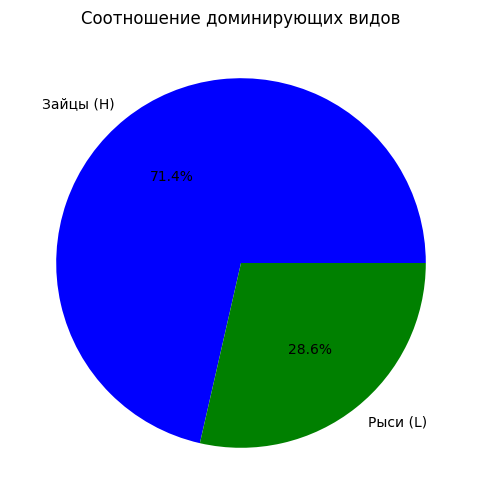

In [ ]:
# 5. Нахождение вида с наибольшей популяцией для каждого года
dominant_species = np.where(hares > lynxes, 'H', 'L')
print("Доминирующие виды по годам:", dominant_species)

# Построение круговой диаграммы для соотношения "H" и "L"
h_count = np.sum(dominant_species == 'H')
l_count = np.sum(dominant_species == 'L')

plt.figure(figsize=(6, 6))
plt.pie([h_count, l_count], labels=['Зайцы (H)', 'Рыси (L)'], autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Соотношение доминирующих видов')
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

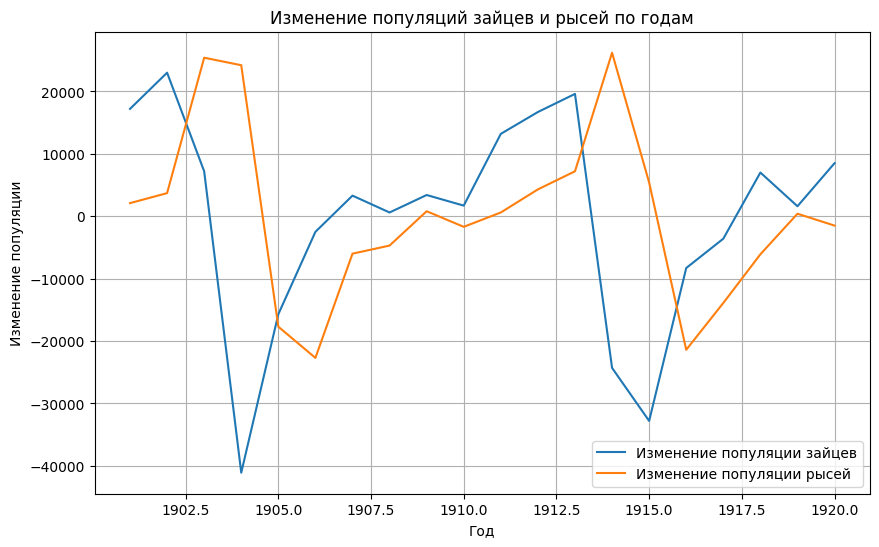

Коэффициент корреляции между изменениями популяций зайцев и рысей: -0.18


In [ ]:
# 6. Построение графика изменения популяций зайцев и рысей
hare_change = np.diff(hares)
lynx_change = np.diff(lynxes)

plt.figure(figsize=(10, 6))
plt.plot(years[1:], hare_change, label='Изменение популяции зайцев')
plt.plot(years[1:], lynx_change, label='Изменение популяции рысей')
plt.xlabel('Год')
plt.ylabel('Изменение популяции')
plt.title('Изменение популяций зайцев и рысей по годам')
plt.legend()
plt.grid(True)
plt.show()

# Нахождение коэффициента корреляции между изменениями популяций
correlation, _ = pearsonr(hare_change, lynx_change)
print(f"Коэффициент корреляции между изменениями популяций зайцев и рысей: {correlation:.2f}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

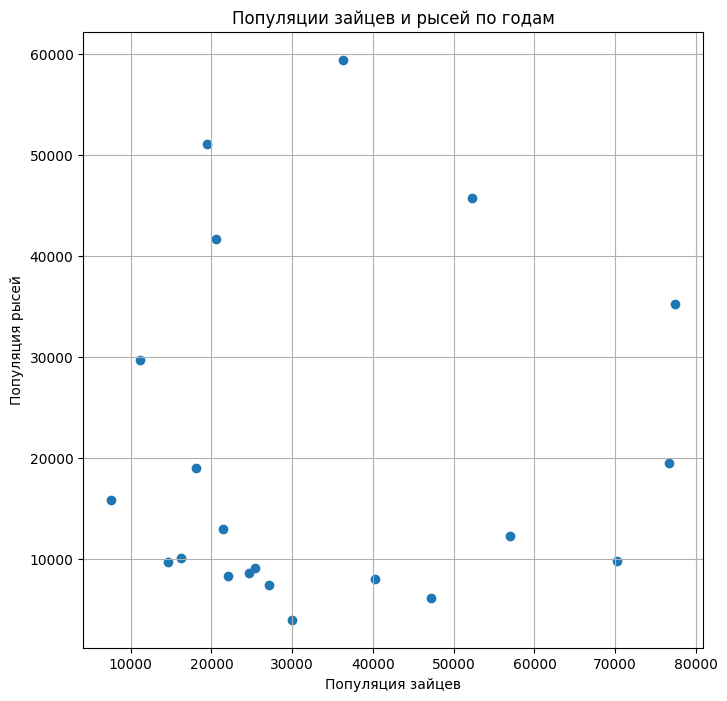

In [ ]:
# 7. Построение scatter plot популяций зайцев и рысей по годам
plt.figure(figsize=(8, 8))
plt.scatter(hares,lynxes)
plt.xlabel('Популяция зайцев')
plt.ylabel('Популяция рысей')
plt.title('Популяции зайцев и рысей по годам')
plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
# 8. Оценка популяции зайцев в 1920 году
# Используем линейную интерполяцию для оценки популяции зайцев в 1920 году
# Исключаем 1920 год из данных для оценки
years_without_1920 = years[years != 1920]
hares_without_1920 = hares[years != 1920]

# Линейная интерполяция
estimated_hare_1920 = np.interp(1920, years_without_1920, hares_without_1920)

# Сравнение с реальным значением
true_hare_1920 = hares[years == 1920][0]
error_ratio = np.abs(estimated_hare_1920 - true_hare_1920) / true_hare_1920

print(f"Оценка популяции зайцев в 1920 году: {estimated_hare_1920:.0f}")
print(f"Реальное значение популяции зайцев в 1920 году: {true_hare_1920:.0f}")
print(f"Отношение ошибки к реальному значению: {error_ratio:.2f}")

Оценка популяции зайцев в 1920 году: 16200
Реальное значение популяции зайцев в 1920 году: 24700
Отношение ошибки к реальному значению: 0.34
